## Should We Make a Movie?

# Technical Summary
Throughout this movie modeling process, many different coding methods were performed. The IMDB Movie Basics served as the baseline for the data used, and data from IMDB Ratings, Movie Gross, and Movie Budgets were used to round out the data collection process. In order to get to the dataframe labeled “df” there were numerous steps taken to merge and clean the data. For the final output, I was able to compare total gross with the movie budget and received a clear understanding of the impact a good movie budget can bring. Next, I compared movie budget to movie ratings and concluded that the data was too close to distinguish a difference great enough to have an impact. Next, I compared the top twenty genre combinations and total gross and concluded that two genre combinations lead by a wide margin. Also, I concluded that action and adventure are genres that dominate the top twenty genre list. Finally, I compared the release month to the monthly total gross mean and found that the summer months are best for releasing movies and maximizing profits. 

# Business Understanding
Microsoft is venturing into the realm of the big screen and is seeking information on how to create big picture movies that will dominate the box office. Operating in the movie-making space can yield boundless rewards but can also bring enormous losses. When evaluating the problem of losing because of a poor creation of a movie, there are three errors that can occur that will guarantee a loss: a lack of a genre, a small budget, and the wrong release date. A lack of a desirable genre will leave the consumer wondering why they should spend their hard-earned money to go to the movies to watch the film. A small budget will restrict who can be brought in to write, direct, and act in the movie creating a strain on the Big 3. If a film lacks the Big 3 there is a chance the movie will be relegated to a B-list movie. Releasing a movie during a time of the year when consumers cannot get to the theatre can destroy a movie’s potential even if the first two problems are alleviated. 

# Imports

Below I am importing the libraries that will be used throughout this notebook to aid in the manipulation, visualization, and processing of dataframes. 

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
im2.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
conn = sqlite3.connect('../zippedData/im2.db')

In [4]:
pd.read_sql("SELECT * FROM sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# IMDB MOVIE BASICS

In [5]:
imdb_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
imdb_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# IMDB RATINGS

In [6]:
imdb_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# MERGE OF TOP TWO TABLES: basic_ratings
-merging imdb_ratings and imdb_basics allows for movie ratings to with movie name, genres, and release year. This allows the data to be easily read. 

In [7]:
basic_ratings = pd.merge(imdb_basics, imdb_ratings, on = "movie_id", how = "left")

In [8]:
basic_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [9]:
basic_ratings['movie_year'] = basic_ratings["primary_title"] + " " + basic_ratings['start_year'].astype('str')
#allows for a unique identifier to merge on across dataframes not in the same network ("movie_year").

In [10]:
basic_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,The Wandering Soap Opera 2017
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,Kuambil Lagi Hatiku 2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,Dankyavar Danka 2013
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,6 Gunn 2017


In [11]:
basic_ratings['start_year'].sort_values()

9599     2010
43264    2010
11550    2010
11551    2010
11552    2010
         ... 
2948     2024
52213    2025
2949     2026
96592    2027
89506    2115
Name: start_year, Length: 146144, dtype: int64

## MOVIE GROSS 

In [12]:
movie_gross = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [13]:
 movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(0)
# I am filling NULL with zeros because it alleviate messy data and allow an accurate number to be found for total_gross.

In [14]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",", "")
# the foreign_gross column had a value that contained a comma ex. 1,000. This comma did not allow foreign and domestic
# gross to be added together because foreign Dtype was an object instead of a float or integer. 

In [15]:
 movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)
# I am filling NULL with zeros because it alleviate messy data and allow an accurate number to be found for total_gross.

In [16]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(float)
# this will turn the foreign_gross column into a float and allow it to be added to the domestic_gross 
# and get a tot_gross column.

In [17]:
movie_gross['tot_gross'] = movie_gross['foreign_gross'] + movie_gross['domestic_gross']

In [18]:
movie_gross['movie_year'] = movie_gross["title"] + " " + movie_gross['year'].astype('str')
#allows for a unique identifier to merge on across dataframes not in the same network ("movie_year").

In [19]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year,tot_gross,movie_year
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After 2010
...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03,The Quake 2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03,Edward II (2018 re-release) 2018
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03,El Pacto 2018
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03,The Swan 2018


# MOVIE BUDGETS

In [20]:
budg_mov = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")

In [21]:
budg_mov.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [22]:
budg_mov['production_budget'] = budg_mov['production_budget'].str.replace(",", "")
# the foreign_gross column had a value that contained a comma ex. 1,000. This comma did not allow the transition to a float


In [23]:
budg_mov['production_budget'] = budg_mov['production_budget'].str.replace("$", "")

In [24]:
budg_mov['production_budget'] = budg_mov['production_budget'].astype(float)
# this will turn the production_budget column into a float and allow it to be better utilized in the final dataframe and 
# matplotting

In [25]:
a = 'Dec 18, 2009'

In [26]:
budg_mov['movie'] + " " + budg_mov['release_date'].str[-4:]
# this allows for the year to pulled from the release_date and adding it to the movie column that 

0                                            Avatar 2009
1       Pirates of the Caribbean: On Stranger Tides 2011
2                                      Dark Phoenix 2019
3                           Avengers: Age of Ultron 2015
4                 Star Wars Ep. VIII: The Last Jedi 2017
                              ...                       
5777                                         Red 11 2018
5778                                      Following 1999
5779                  Return to the Land of Wonders 2005
5780                           A Plague So Pleasant 2015
5781                              My Date With Drew 2005
Length: 5782, dtype: object

In [27]:
budg_mov['movie_year'] = budg_mov['movie'] + " " + budg_mov['release_date'].str[-4:]

In [28]:
budg_mov

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_year
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279",Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,$0,Red 11 2018
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495",Following 1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338",Return to the Land of Wonders 2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0,A Plague So Pleasant 2015


# Merge of Messiness

In [29]:
df = basic_ratings.merge(movie_gross, on='movie_year')
# main source of data has "movie_gross", "imdb_ratings", "imdb_basics"(merged into the basic_ratings) 
# merged into one table to create df. This will allow for allow the neccessary data to be pulled from one source and better
# organized.

In [30]:
df = df.merge(budg_mov, on='movie_year')

In [31]:
df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_year,title,...,domestic_gross_x,foreign_gross,year,tot_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty 2013,The Secret Life of Walter Mitty,...,58200000.0,129900000.0,2013,188100000.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,"$58,236,838","$187,861,183"
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones 2014,A Walk Among the Tombstones,...,26300000.0,26900000.0,2014,53200000.0,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,"$26,017,685","$62,108,587"
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World 2015,Jurassic World,...,652300000.0,1019.4,2015,652301019.4,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625","$1,648,854,864"
3,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,The Rum Diary 2011,The Rum Diary,...,13100000.0,10800000.0,2011,23900000.0,16,"Oct 28, 2011",The Rum Diary,45000000.0,"$13,109,815","$21,544,732"
4,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570.0,The Three Stooges 2012,The Three Stooges,...,44300000.0,10500000.0,2012,54800000.0,4,"Apr 13, 2012",The Three Stooges,30000000.0,"$44,338,224","$54,052,249"
5,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366.0,Tangled 2010,Tangled,...,200800000.0,391000000.0,2010,591800000.0,15,"Nov 24, 2010",Tangled,260000000.0,"$200,821,936","$586,477,240"
6,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0,John Carter 2012,John Carter,...,73100000.0,211100000.0,2012,284200000.0,14,"Mar 9, 2012",John Carter,275000000.0,"$73,058,679","$282,778,100"
7,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114.0,Comedy,5.9,91546.0,Dinner for Schmucks 2010,Dinner for Schmucks,...,73000000.0,13800000.0,2010,86800000.0,51,"Jul 30, 2010",Dinner for Schmucks,69000000.0,"$73,026,337","$86,796,502"
8,tt0429493,The A-Team,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256.0,The A-Team 2010,The A-Team,...,77200000.0,100000000.0,2010,177200000.0,32,"Jun 11, 2010",The A-Team,110000000.0,"$77,222,099","$177,241,171"
9,tt0431021,The Possession,The Possession,2012,92.0,"Horror,Mystery,Thriller",5.9,53649.0,The Possession 2012,The Possession,...,49100000.0,36300000.0,2012,85400000.0,81,"Aug 31, 2012",The Possession,14000000.0,"$49,130,588","$82,925,064"


In [32]:
df = df.drop(columns='primary_title')

In [33]:
df = df.drop(columns='title')


In [34]:
df = df.drop(columns='start_year')

In [35]:
df = df.drop(columns='movie')

In [36]:
df = df.drop(columns='domestic_gross_y')

In [37]:
df = df.drop(columns='worldwide_gross')

In [38]:
df = df.drop(columns='id')

In [39]:
df = df[['movie_id', 'original_title', 'genres', 'runtime_minutes', 'release_date', 'studio', 'production_budget', 'domestic_gross_x', 'foreign_gross', 'tot_gross', 'averagerating', 'numvotes', 'movie_year', 'year']]

In [40]:
df
# the dropping of the columns and reordering allows the dataframe 
# to flow better and not be bogged down with data that is repeated

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year
0,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,"Dec 25, 2013",Fox,91000000.0,58200000.0,129900000.0,188100000.0,7.3,275300.0,The Secret Life of Walter Mitty 2013,2013
1,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,"Sep 19, 2014",Uni.,28000000.0,26300000.0,26900000.0,53200000.0,6.5,105116.0,A Walk Among the Tombstones 2014,2014
2,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",124.0,"Jun 12, 2015",Uni.,215000000.0,652300000.0,1019.4,652301019.4,7.0,539338.0,Jurassic World 2015,2015
3,tt0376136,The Rum Diary,"Comedy,Drama",119.0,"Oct 28, 2011",FD,45000000.0,13100000.0,10800000.0,23900000.0,6.2,94787.0,The Rum Diary 2011,2011
4,tt0383010,The Three Stooges,"Comedy,Family",92.0,"Apr 13, 2012",Fox,30000000.0,44300000.0,10500000.0,54800000.0,5.1,28570.0,The Three Stooges 2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,tt7388562,"Paul, Apostle of Christ","Adventure,Biography,Drama",108.0,"Mar 23, 2018",Affirm,5000000.0,17600000.0,5500000.0,23100000.0,6.7,5662.0,"Paul, Apostle of Christ 2018",2018
1048,tt7401588,Instant Family,"Comedy,Drama",118.0,"Nov 16, 2018",Par.,48000000.0,67400000.0,53200000.0,120600000.0,7.4,46728.0,Instant Family 2018,2018
1049,tt7535780,The Great Wall,Documentary,72.0,"Feb 17, 2017",Uni.,150000000.0,45500000.0,289400000.0,334900000.0,6.5,24.0,The Great Wall 2017,2017
1050,tt7784604,Hereditary,"Drama,Horror,Mystery",127.0,"Jun 8, 2018",A24,10000000.0,44100000.0,35300000.0,79400000.0,7.3,151571.0,Hereditary 2018,2018


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1051
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1052 non-null   object 
 1   original_title     1052 non-null   object 
 2   genres             1051 non-null   object 
 3   runtime_minutes    1047 non-null   float64
 4   release_date       1052 non-null   object 
 5   studio             1052 non-null   object 
 6   production_budget  1052 non-null   float64
 7   domestic_gross_x   1052 non-null   float64
 8   foreign_gross      1052 non-null   float64
 9   tot_gross          1052 non-null   float64
 10  averagerating      1043 non-null   float64
 11  numvotes           1043 non-null   float64
 12  movie_year         1052 non-null   object 
 13  year               1052 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 123.3+ KB


# Question 1:
- What are the correlations between movie budget and total gross?
   

In [42]:
#df['production_budget'].sort_values(ascending=False).head(25)
#t_numvotes = 
df.sort_values('production_budget', ascending=False)[:5]

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year
231,tt1298650,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",136.0,"May 20, 2011",BV,410600000.0,241100000.0,804600000.0,1.045700e+09,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides 2011,2011
742,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",141.0,"May 1, 2015",BV,330600000.0,459000000.0,946400000.0,1.405400e+09,7.3,665594.0,Avengers: Age of Ultron 2015,2015
925,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0,"Apr 27, 2018",BV,300000000.0,678800000.0,1369.5,6.788014e+08,8.5,670926.0,Avengers: Infinity War 2018,2018
93,tt0974015,Justice League,"Action,Adventure,Fantasy",120.0,"Nov 17, 2017",WB,300000000.0,229000000.0,428900000.0,6.579000e+08,6.5,329135.0,Justice League 2017,2017
734,tt2379713,Spectre,"Action,Adventure,Thriller",148.0,"Nov 6, 2015",Sony,300000000.0,200100000.0,680600000.0,8.807000e+08,6.8,352504.0,Spectre 2015,2015


In [43]:
df.sort_values('production_budget', ascending=True)[:5]

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year
399,tt1570989,Tiny Furniture,"Comedy,Drama,Romance",98.0,"Nov 12, 2010",IFC,50000.0,392000.0,0.0,392000.0,6.2,13397.0,Tiny Furniture 2010,2010
711,tt2309260,The Gallows,"Horror,Mystery,Thriller",81.0,"Jul 10, 2015",WB (NL),100000.0,22800000.0,20200000.0,43000000.0,4.2,17763.0,The Gallows 2015,2015
1023,tt6265828,A Ghost Story,"Drama,Fantasy,Romance",92.0,"Jul 7, 2017",A24,100000.0,1600000.0,0.0,1600000.0,6.8,46280.0,A Ghost Story 2017,2017
386,tt1549572,Another Earth,"Drama,Romance,Sci-Fi",92.0,"Jul 22, 2011",FoxS,175000.0,1300000.0,456000.0,1756000.0,7.0,85839.0,Another Earth 2011,2011
525,tt1758692,Like Crazy,"Drama,Romance",86.0,"Oct 28, 2011",ParV,250000.0,3400000.0,336000.0,3736000.0,6.7,55841.0,Like Crazy 2011,2011


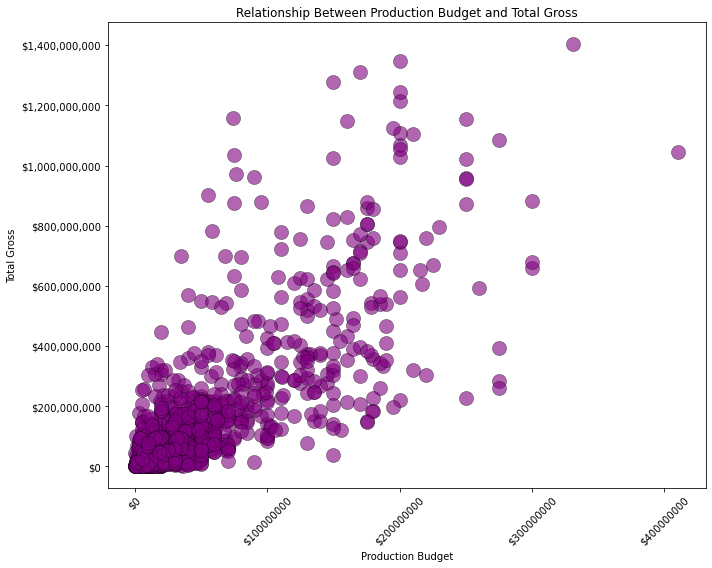

In [44]:
#df.plot(x='production_budget', y='tot_gross', kind='scatter')
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x=df['production_budget'], y=df['tot_gross'], color='purple', 
           alpha=.6, edgecolor='black', linewidth=.5, s=200)

ax.xaxis.set_major_formatter(StrMethodFormatter('${x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

plt.xticks(rotation=45)

ax.set_xlabel('Production Budget')
ax.set_ylabel('Total Gross')
ax.set_title('Relationship Between Production Budget and Total Gross')

plt.tight_layout()

In [49]:
df['budget_bin_one'] = pd.cut(df['production_budget'], bins=10, labels=['\$0-$41', '\$41-$82', '\$82-$123', '\$123-$164', '\$164-$205', '\$205-$246', '\$246-$287', '\$287-$328', '\$328-$369', '\$369-$410'])

<AxesSubplot:xlabel='budget_bin_one'>

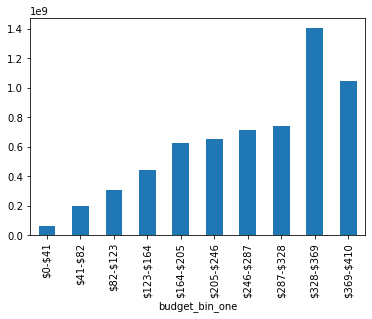

In [50]:
df.groupby('budget_bin_one').mean()['tot_gross'].plot.bar()


In [51]:
df_group = df.groupby('budget_bin_one').mean()['tot_gross']

df_group.reset_index()
# grouping the data in set ranges will allow for a look at the median tot_gross and allow for a clean bar graph that will
# show which range of production_budget has the highest profit. 

,budget_bin_one,tot_gross
0,\$0-$41,6.213157e+07
1,\$41-$82,1.955923e+08
2,\$82-$123,3.076301e+08
3,\$123-$164,4.399530e+08
4,\$164-$205,6.212036e+08
5,\$205-$246,6.509126e+08
6,\$246-$287,7.093546e+08
7,\$287-$328,7.391338e+08
8,\$328-$369,1.405400e+09
9,\$369-$410,1.045700e+09


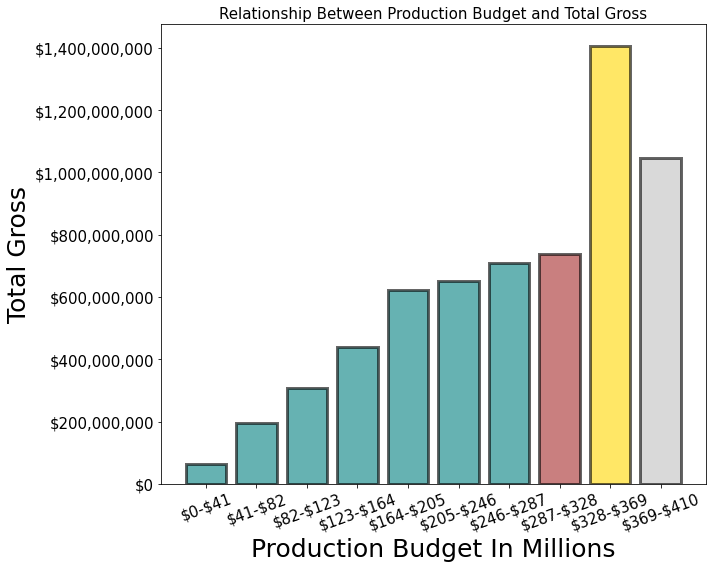

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x=df_group.index, height=df_group.values, color='teal', alpha=.6, edgecolor='black', linewidth=3)

# ax.xaxis.set_major_formatter(StrMethodFormatter('${x}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

plt.xticks(rotation=20, fontsize=15)
plt.yticks(fontsize = 15)

ax.patches[8].set_facecolor('gold')
ax.patches[7].set_facecolor('brown')
ax.patches[9].set_facecolor('silver')

ax.set_xlabel('Production Budget In Millions', fontsize=25)
ax.set_ylabel('Total Gross', fontsize=25)
ax.set_title('Relationship Between Production Budget and Total Gross', fontsize=15)

plt.tight_layout()

## Observation
- Form:
- Direction:
- Strength
- Outliers:
- The scatterplot shows a strong, positive, linear association between production budget and total gross. There are multiple outliers.
- The bar graph shows that the higher the productuion budget the higher the total gross return. The range of 328M - 369M returns the highest return on investment with 369M - 410M returning the second highest amount. 

# Question 2:
- What are the correlation between movie budget and movie ratings?
    - advertisement foreign and domestic?


In [55]:
df.sort_values('numvotes', ascending=False)[:3]

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year,budget_bin_one
275,tt1375666,Inception,"Action,Adventure,Sci-Fi",148.0,"Jul 16, 2010",WB,160000000.0,292600000.0,535700000.0,8.283000e+08,8.8,1841066.0,Inception 2010,2010,\$123-$164M
263,tt1345836,The Dark Knight Rises,"Action,Thriller",164.0,"Jul 20, 2012",WB,275000000.0,448100000.0,636800000.0,1.084900e+09,8.4,1387769.0,The Dark Knight Rises 2012,2012,\$246-$287M
56,tt0816692,Interstellar,"Adventure,Drama,Sci-Fi",169.0,"Nov 5, 2014",Par.,165000000.0,188000000.0,489400000.0,6.774000e+08,8.6,1299334.0,Interstellar 2014,2014,\$164-$205M


In [56]:
df.sort_values('numvotes', ascending=True)[:3]

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year,budget_bin_one
479,tt1825978,The Artist,Thriller,100.0,"Nov 25, 2011",Wein.,16000000.0,44700000.0,88800000.0,133500000.0,6.8,6.0,The Artist 2011,2011,\$0-$41M
424,tt2447982,Abduction,"Horror,Thriller",84.0,"Sep 23, 2011",LGF,35000000.0,28100000.0,54000000.0,82100000.0,5.2,10.0,Abduction 2011,2011,\$0-$41M
589,tt2926868,Lokroep,Documentary,25.0,"Mar 15, 2013",TriS,12800000.0,51900000.0,16700000.0,68600000.0,7.9,12.0,The Call 2013,2013,\$0-$41M


In [57]:
avg_rt_bin = df.groupby('budget_bin_one').mean()['averagerating']

In [58]:
avg_rt_bin

budget_bin_one
\$0-$41M       6.400303
\$41-$82M      6.369143
\$82-$123M     6.423810
\$123-$164M    6.715152
\$164-$205M    7.062500
\$205-$246M    6.375000
\$246-$287M    7.300000
\$287-$328M    7.266667
\$328-$369M    7.300000
\$369-$410M    6.600000
Name: averagerating, dtype: float64

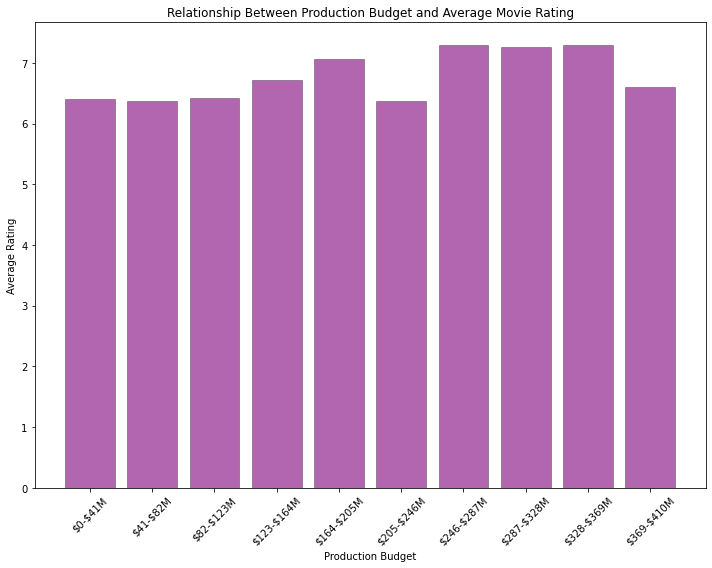

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x=avg_rt_bin.index, height=avg_rt_bin.values, color='#80007c', alpha=.6, edgecolor='black', linewidth=.5)

# ax.xaxis.set_major_formatter(StrMethodFormatter('${x:.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)

ax.set_xlabel('Production Budget')
ax.set_ylabel('Average Rating')
ax.set_title('Relationship Between Production Budget and Average Movie Rating')

plt.tight_layout()

# Observation
- The average rating for movies with a project budget of 287M - 369M is around 7.4. The data shows that the lower the production budget the higher the chance of receiving bad reviews and the higher the production budget the higher the chance of receiving good reviews.
- Theres not enough range in the data to show a true difference across the different budgets

# Question 3:
- What genres have grossed the most revenue?


In [60]:
df.genres.value_counts().index

Index(['Adventure,Animation,Comedy', 'Comedy,Drama,Romance',
       'Action,Adventure,Sci-Fi', 'Comedy', 'Comedy,Drama', 'Drama',
       'Comedy,Romance', 'Drama,Romance', 'Action,Adventure,Fantasy',
       'Action,Crime,Drama',
       ...
       'Mystery,Thriller', 'Horror,Mystery', 'Comedy,Horror,Romance',
       'Action,Drama,War', 'Action,Biography,Comedy', 'Drama,Mystery,Romance',
       'Comedy,Drama,Mystery', 'Action,Comedy,Sport', 'Comedy,Sci-Fi',
       'Comedy,Documentary'],
      dtype='object', length=181)

In [61]:
df[['genres', 'tot_gross']].mean()

tot_gross    1.680130e+08
dtype: float64

In [62]:
genres = df.groupby('genres')['tot_gross'].agg(['mean', 'count']).reset_index()

In [63]:
five_genres_up = genres.loc[genres['count'] >= 5]

In [64]:
top_twenty_genres = five_genres_up.sort_values('mean', ascending=False).head(20)

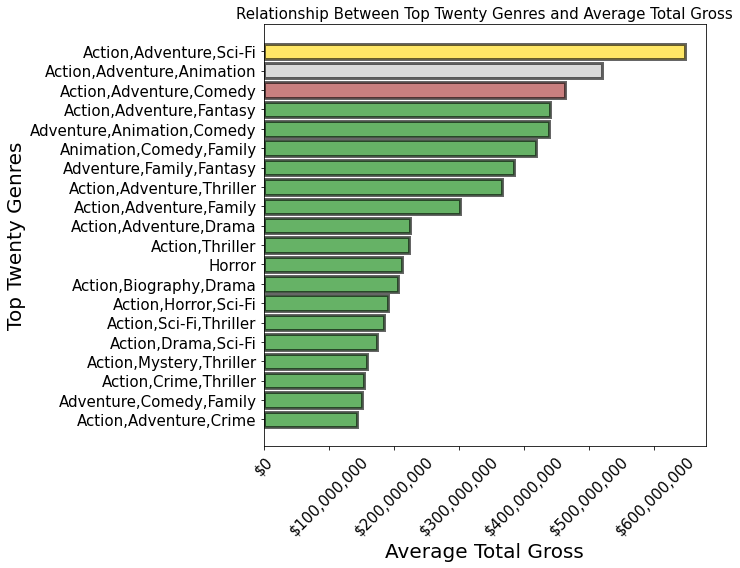

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(y=top_twenty_genres['genres'], width=top_twenty_genres['mean'], color='green', 
       alpha=.6, edgecolor='black', linewidth=3)

ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

ax.patches[0].set_facecolor('gold')
ax.patches[2].set_facecolor('brown')
ax.patches[1].set_facecolor('silver')


ax.invert_yaxis()

ax.set_xlabel('Average Total Gross', fontsize=20)
ax.set_ylabel('Top Twenty Genres', fontsize=20)
ax.set_title('Relationship Between Top Twenty Genres and Average Total Gross', fontsize=15)

plt.tight_layout()

# Observation
- The top genre from a total gross standpoint is 'Action, Adventure, Sci_Fi' coming in over 600 million followed by 
'Action, Adventure, Animation' and 'Action, adventure, comedy'.
- Action is accounted for in 75% of the top_twenty_genres.
- Adventure is accounted for in 55% of the top_twenty_genres.
- The 'Action, Adventure' combination accounts for 40% of the top_twenty_genres

# Question 4:
- What is the best release month?

In [66]:
df.head(1)

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year,budget_bin_one
0,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,"Dec 25, 2013",Fox,91000000.0,58200000.0,129900000.0,188100000.0,7.3,275300.0,The Secret Life of Walter Mitty 2013,2013,\$82-$123M


In [67]:
df['release_date'].str[-4:]

0       2013
1       2014
2       2015
3       2011
4       2012
        ... 
1047    2018
1048    2018
1049    2017
1050    2018
1051    2018
Name: release_date, Length: 1052, dtype: object

In [68]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [69]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month

In [70]:
df.head(2)

,movie_id,original_title,genres,runtime_minutes,release_date,studio,production_budget,domestic_gross_x,foreign_gross,tot_gross,averagerating,numvotes,movie_year,year,budget_bin_one,release_month
0,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,2013-12-25,Fox,91000000.0,58200000.0,129900000.0,188100000.0,7.3,275300.0,The Secret Life of Walter Mitty 2013,2013,\$82-$123M,12
1,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,2014-09-19,Uni.,28000000.0,26300000.0,26900000.0,53200000.0,6.5,105116.0,A Walk Among the Tombstones 2014,2014,\$0-$41M,9


In [71]:
best_release_month = df.groupby('release_month')['tot_gross'].agg(['mean']).reset_index()

In [72]:
best_release_month['mean']/1000000

0      83.574382
1     158.504661
2     151.120061
3     128.793824
4     273.816090
5     275.420374
6     232.610092
7     110.537555
8      82.740440
9      91.698569
10    202.161585
11    191.242442
Name: mean, dtype: float64

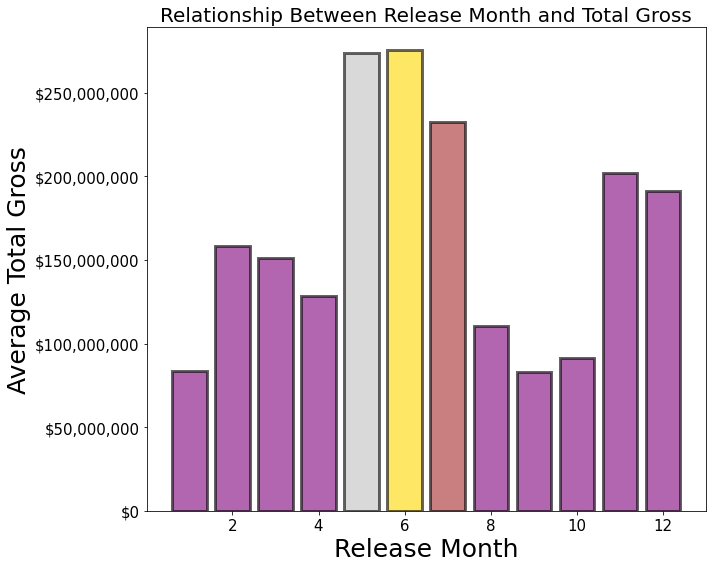

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x=best_release_month['release_month'], height=best_release_month['mean'], color='#80007c', 
       alpha=.6, edgecolor='black', linewidth=3)

#ax.xaxis.set_major_formatter(StrMethodFormatter('${x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

ax.patches[5].set_facecolor('gold')
ax.patches[6].set_facecolor('brown')
ax.patches[4].set_facecolor('silver')

ax.set_xlabel('Release Month', fontsize=25)
ax.set_ylabel('Average Total Gross', fontsize=25)
ax.set_title('Relationship Between Release Month and Total Gross',fontsize=20)

plt.tight_layout()

# Observation
- The summer months are highest grossing time to release a movie with the latter part of winter being the second highest 
grossing time of the year. This is most likely because of school being out and teenagers having more time to spend at the 
movies compared during the months dedicated to school.

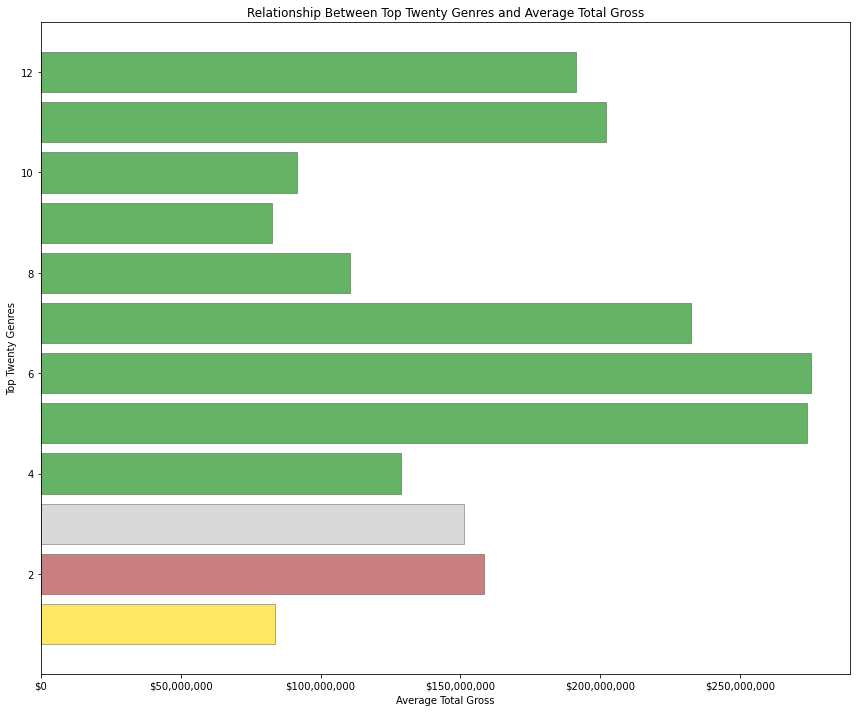

In [74]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.barh(y=best_release_month['release_month'], width=best_release_month['mean'], color='green', 
       alpha=.6, edgecolor='black', linewidth=.5)

ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

#plt.xticks(rotation=45)

ax.patches[0].set_facecolor('gold')
ax.patches[1].set_facecolor('brown')
ax.patches[2].set_facecolor('silver')


#ax.invert_yaxis()

ax.set_xlabel('Average Total Gross')
ax.set_ylabel('Top Twenty Genres')
ax.set_title('Relationship Between Top Twenty Genres and Average Total Gross')

plt.tight_layout()

# LIMITATIONS

# Overall Conclusions
Throughout this movie data modeling process, many different coding iterations were run. In the end, the iterations that yielded the best results were the movie budget compared to total gross, top twenty genre combinations compared to total gross, and release month compared to total gross. The movie budget compared to total gross yielded the result that \\$328-$369 Million will return the most for Microsoft investment. Next, the top twenty genre combinations compared to total gross yielded that action and adventure are the genres best suited to maximizing a generous return on investment. Finally, the release month compared to total gross yielded that the summer time is best suited to release a movie followed by the winter. All these reasons support why this model would be a great benefit for Microsoft as they venture into the space of movie creation. 